## Ground truth curvature

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import pandas as pd

## Ellipsoid

In [8]:
def generate_ellipsoid_cloud(a, b, c, num_points = 5000):
    """Generate a random point on an ellipsoid defined by a,b,c"""
    
    theta = np.random.uniform(0, 2*np.pi, num_points)
    v = np.random.rand(num_points)
    phi = np.arccos(2.0 * v - 1.0)
    sinTheta = np.sin(theta);
    cosTheta = np.cos(theta);
    sinPhi = np.sin(phi);
    cosPhi = np.cos(phi);
    rx = a * sinPhi * cosTheta;
    ry = b * sinPhi * sinTheta;
    rz = c * cosPhi;
    return np.column_stack((rx, ry, rz))

def ellipsoid_ground_truth(point_cloud, a, b, c):
    #point_cloud: N by 3 array
    cur = []
    for p in point_cloud:
        k = 1 / (a **2 * b**2 * c**2 * (p[0]**2 / a**4 + p[1]**2 / b**4 + p[2]**2 / c**4) **2)
        cur.append(k)
    return cur
        

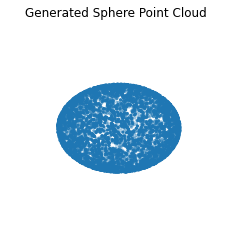

In [82]:
ellipsoid = generate_ellipsoid_cloud(0.9, 1.25, 0.9)

# Visualize the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=5)
ax.set_aspect('equal')
ax.set_title("Generated Sphere Point Cloud")
ax.view_init(0, 0)
plt.axis('off')
plt.show()

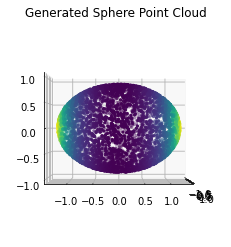

In [83]:
cc = ellipsoid_ground_truth(ellipsoid, 0.9, 1.25, 0.9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=5, c = cc)
ax.set_aspect('equal')
ax.set_title("Generated Sphere Point Cloud")
ax.view_init(0, 0)

plt.show()

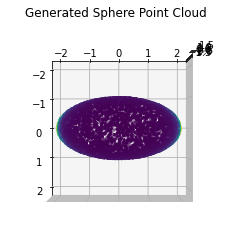

In [66]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=5, c = cc)
ax.set_aspect('equal')
ax.set_title("Generated Sphere Point Cloud")
ax.view_init(90, 0)

plt.show()

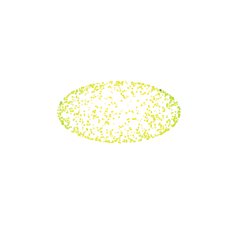

In [89]:
ellipsoid = pd.read_csv('output/ellipsoid_cloud_ratio_4.csv', sep=',', header=None)
ellipsoid = np.array(ellipsoid)
df = pd.read_csv('output/curvature_ellipsoid_ratio_4.csv', sep=',', header=None)
v = df.squeeze()
cc = -v
num_eval = int(len(ellipsoid)/5)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=0.5, c = cc[:num_eval])
#ax.set_title("Curvature on torus point cloud")
ax.view_init(90, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()


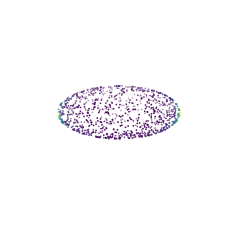

In [24]:
ground = ellipsoid_ground_truth(ellipsoid, 1, 2, 0.5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=0.5, c = ground[:num_eval])
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()

## Torus 

## Hyperboloid

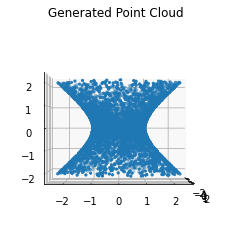

In [102]:
def generate_hyperboloid_cloud(a, b, c, num_points=5000):
    
    u = np.random.uniform(-1.5,1.5,num_points)
    v = np.random.uniform(0, 2 * np.pi, num_points)

    x = a*np.cosh(u)*np.cos(v)
    y = b*np.cosh(u)*np.sin(v)
    z = c*np.sinh(u)

    return np.column_stack((x, y, z))


np.random.seed(40)
# Generate a sphere point cloud with 1000 points and radius 1
hyperboloid = generate_hyperboloid_cloud(1, 1, 1)

# Visualize the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hyperboloid[:, 0], hyperboloid[:, 1], hyperboloid[:, 2], s=5)
ax.set_title("Generated Point Cloud")
ax.view_init(0, 0)
plt.show()

In [103]:
def hyperboloid_ground_truth(point_cloud, a, b, c):
    #point_cloud: N by 3 array
    cur = []
    for p in point_cloud:
        k = - c **6 / (c **4 + a**2 * p[2]**2 + b**2 * p[2]**2) **2
        cur.append(k)
    return cur

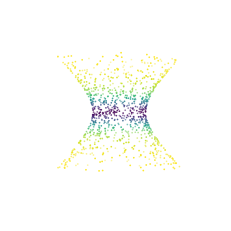

In [104]:
cur_hyper = hyperboloid_ground_truth(hyperboloid, 1, 1, 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[:num_eval, 0], hyperboloid[:num_eval, 1], hyperboloid[:num_eval, 2], s=0.5, c = cur_hyper[:num_eval])
#ax.set_title("Curvature on torus point cloud")
ax.view_init(0, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()